In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [84]:
data = pd.read_csv("temperature.csv")

data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [85]:
data.shape

(7752, 25)

Our dataset contains 7752 rows (observations) and 25 columns(features).

In [86]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

As the "Date" column has in object data type we need to convert it into numeric data type.

In [87]:
data["Date"] = pd.to_datetime(data.Date, format='%d-%m-%Y')

In [88]:
data.reset_index(inplace = True)
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day

data.set_index("Date",inplace = True)

In [89]:
data.head()

,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,
2013-06-30,0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013.0,6.0,30.0
2013-06-30,1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013.0,6.0,30.0
2013-06-30,2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013.0,6.0,30.0
2013-06-30,3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013.0,6.0,30.0
2013-06-30,4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013.0,6.0,30.0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7752 entries, 2013-06-30 to NaT
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7752 non-null   int64  
 1   station           7750 non-null   float64
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null

In [91]:
data.describe()

,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7752.000000,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000,7750.000000,7750.000000,7750.000000
mean,3875.500000,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,2015.000000,7.467742,15.983871
std,2237.953976,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613,1.414305,0.530334,8.918647
min,0.000000,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,6.000000,1.000000
25%,1937.750000,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,3875.500000,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.000000
75%,5813.250000,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.000000
max,7751.000000,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,8.000000,31.000000


Checking null values.

In [92]:
data.isnull().sum()

index                0
station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 2
Month                2
Day                  2
dtype: int64

As we seen the data the last 2 rows don't have station and date info so we will drop.

In [93]:
data.drop(data.tail(2).index, inplace = True)

In [94]:
data.isnull().sum()

index                0
station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 0
Month                0
Day                  0
dtype: int64

Now station and date doesn't contain any null values so we will fill the remaining null values.

Gone through the dataset we observed that all the columns are grouped in 3 group.Based on the number of missing values now we will check whether if these missing values are at the same indices. 

In [95]:
index_present_tmax = data['Present_Tmax'].index[data['Present_Tmax'].apply(np.isnan)]
index_present_tmin = data['Present_Tmin'].index[data['Present_Tmin'].apply(np.isnan)]

index_next_tmax = data['Next_Tmax'].index[data['Next_Tmax'].apply(np.isnan)]
index_next_tmin = data['Next_Tmin'].index[data['Next_Tmin'].apply(np.isnan)]

index_LDAPS_RHmax = data['LDAPS_RHmax'].index[data['LDAPS_RHmax'].apply(np.isnan)]
index_LDAPS_RHmin = data['LDAPS_RHmin'].index[data['LDAPS_RHmin'].apply(np.isnan)]
index_LDAPS_Tmax_lapse = data['LDAPS_Tmax_lapse'].index[data['LDAPS_Tmax_lapse'].apply(np.isnan)]
index_LDAPS_Tmin_lapse = data['LDAPS_Tmin_lapse'].index[data['LDAPS_Tmin_lapse'].apply(np.isnan)]
index_LDAPS_WS = data['LDAPS_WS'].index[data['LDAPS_WS'].apply(np.isnan)]
index_LDAPS_LH = data['LDAPS_LH'].index[data['LDAPS_LH'].apply(np.isnan)]
index_LDAPS_CC1 = data['LDAPS_CC1'].index[data['LDAPS_CC1'].apply(np.isnan)]
index_LDAPS_CC2 = data['LDAPS_CC2'].index[data['LDAPS_CC2'].apply(np.isnan)]
index_LDAPS_CC3 = data['LDAPS_CC3'].index[data['LDAPS_CC3'].apply(np.isnan)]
index_LDAPS_CC4 = data['LDAPS_CC4'].index[data['LDAPS_CC4'].apply(np.isnan)]
index_LDAPS_PPT1 = data['LDAPS_PPT1'].index[data['LDAPS_PPT1'].apply(np.isnan)]
index_LDAPS_PPT2 = data['LDAPS_PPT2'].index[data['LDAPS_PPT2'].apply(np.isnan)]
index_LDAPS_PPT3 = data['LDAPS_PPT3'].index[data['LDAPS_PPT3'].apply(np.isnan)]
index_LDAPS_PPT4 = data['LDAPS_PPT4'].index[data['LDAPS_PPT4'].apply(np.isnan)]



if list (index_present_tmax) == list(index_present_tmin):
    print('Lists are identical')
else: 
    print('Unidentical lists')
    
if list (index_next_tmax) == list(index_next_tmin):
    print('Lists are identical')
else:
    print('Unidentical lists')
    
    
if list(index_LDAPS_RHmax) == list(index_LDAPS_RHmin) == list(index_LDAPS_Tmax_lapse) == list(index_LDAPS_Tmin_lapse) == list(index_LDAPS_WS) == list(index_LDAPS_LH) == list(index_LDAPS_CC1) == list(index_LDAPS_CC2) == list(index_LDAPS_CC3) == list(index_LDAPS_CC4) == list(index_LDAPS_PPT1) == list(index_LDAPS_PPT2) == list(index_LDAPS_PPT3) == list(index_LDAPS_PPT4):
    print('Lists are identical')
else:
    print('Unidentical lists')

Lists are identical
Lists are identical
Lists are identical


As we get the all the columns on same indexes we can see all the missing values.

Now, in our dataset there are 25 stations, let's divide all the data according to the stations.

In [96]:
no_of_stations = 25
station = [[] for _ in range(no_of_stations+1)]

for i in range(1,len(station)):
    station[i] = data.loc[data['station'] == i]
    
    
for i in range(1,len(station)):
    station[i] = station[i].fillna(station[i].mean())
    #station[i].set_index('Date',inplace = True)

In [97]:
new_data = pd.DataFrame(columns = ['lat','lon'],index = range(0,25))
for i in range(0,25):
    new_data['lat'][i] = data['lat'][i]
    new_data['lon'][i] = data['lon'][i]

In [98]:
new_data.head()

,lat,lon
0,37.6046,126.991
1,37.6046,127.032
2,37.5776,127.058
3,37.645,127.022
4,37.5507,127.135


Visualizing the data:-

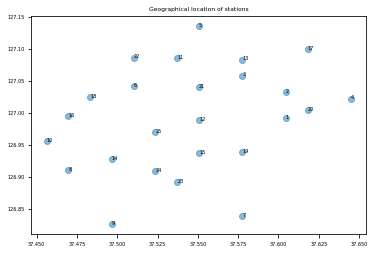

In [101]:
fig,ax = plt.subplots()
ax.scatter(new_data['lat'],new_data['lon'],alpha = 0.5)
plt.title('Geographical location of stations')

labels = [i for i in range(1,len(station))]
for i, txt in enumerate(labels):
    ax.annotate(txt, (new_data['lat'][i],new_data['lon'][i]))

We have visualize the data using scatter plot and the new dataframe which we create using lantitude and longitude of stations.

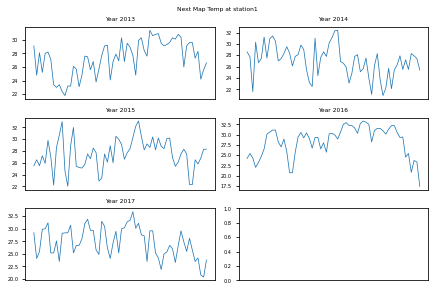

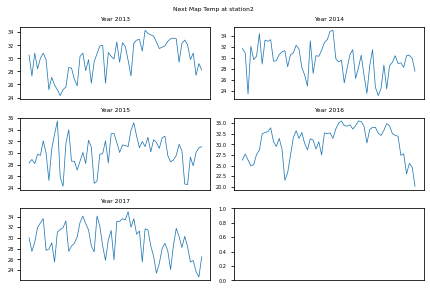

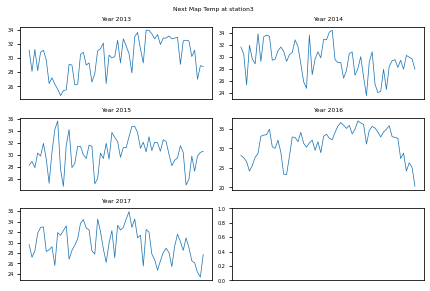

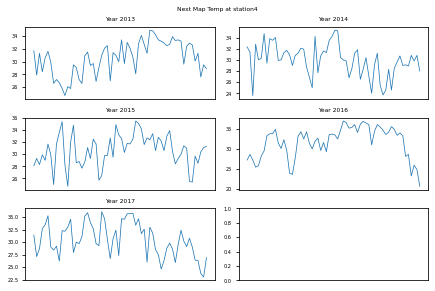

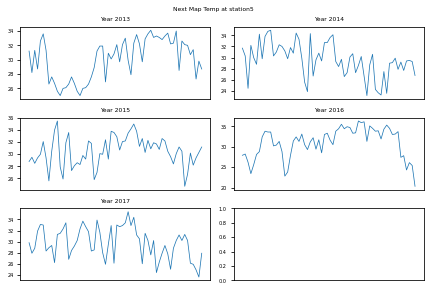

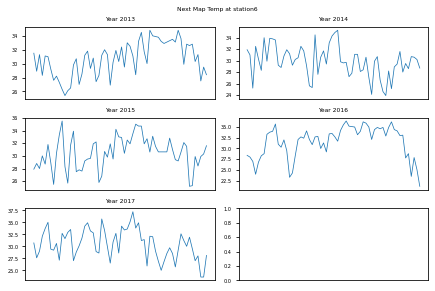

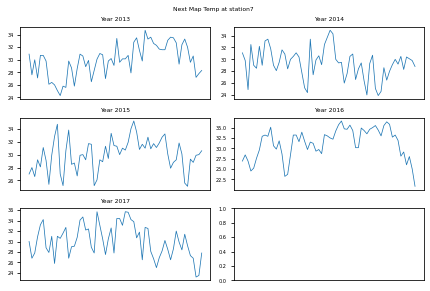

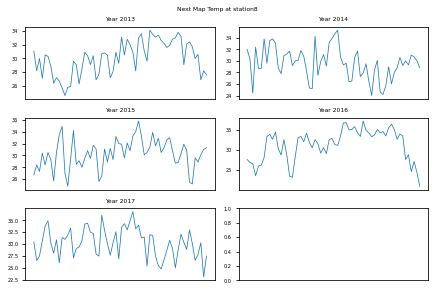

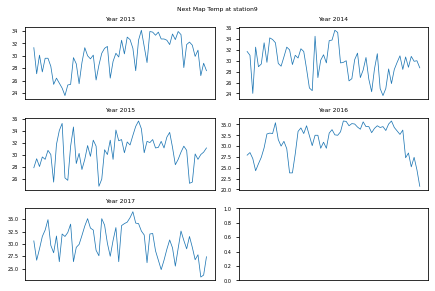

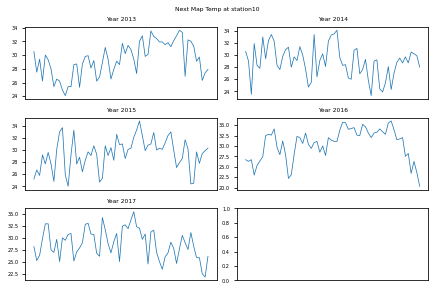

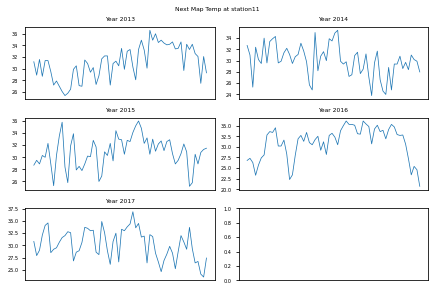

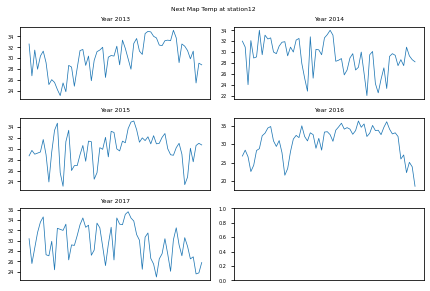

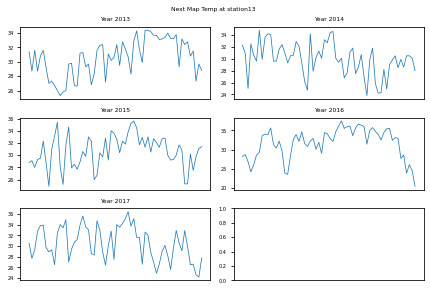

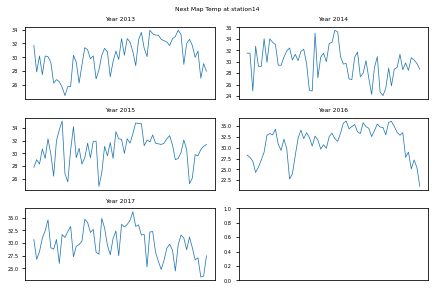

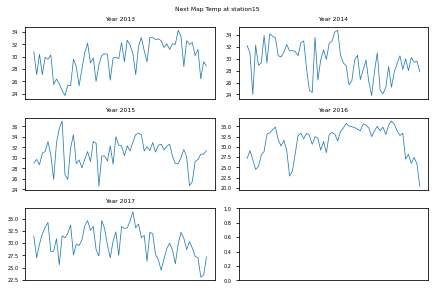

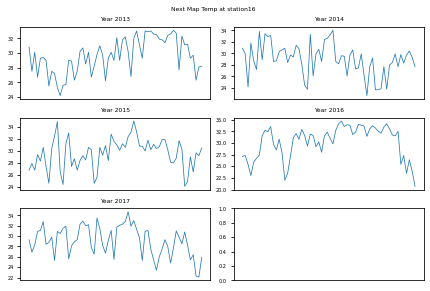

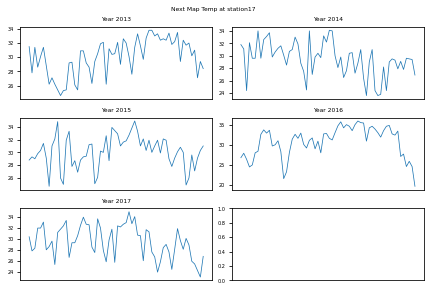

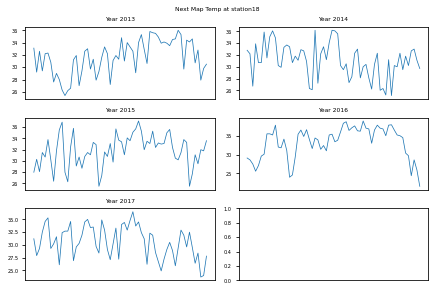

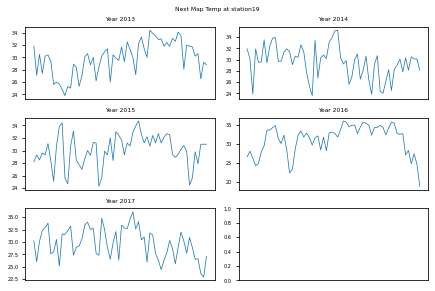

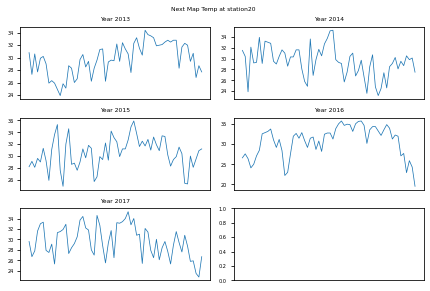

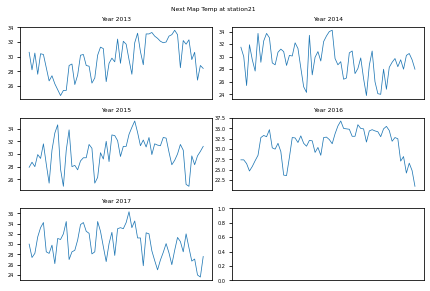

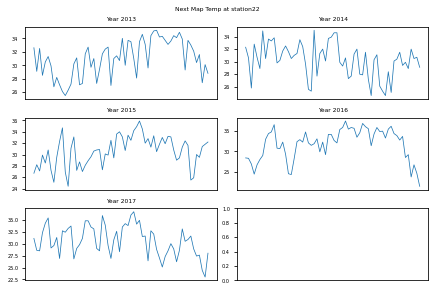

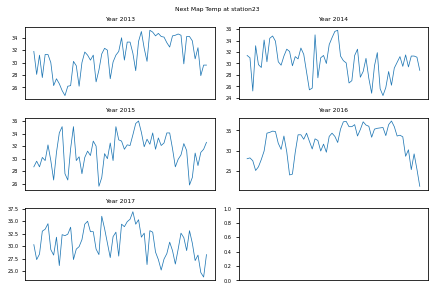

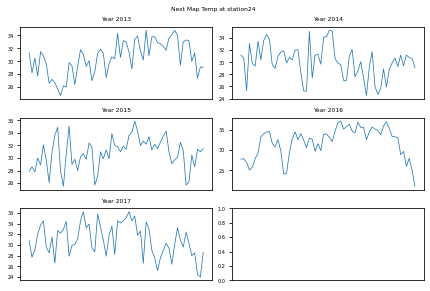

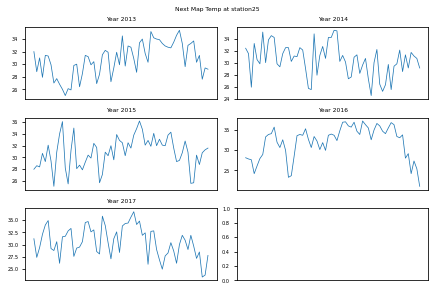

In [100]:
for i in range(1,len(station)):
    
    plt.rcParams.update({'font.size':5})
    ncols = 2
    nrows = 3
    
    fig, axes = plt.subplots(nrows = nrows, ncols = ncols)
    fig.suptitle('Next Map Temp at station{}'.format(i))
    years = [2013,2014,2015,2016,2017]
    
    for ax, j in zip(axes.flatten(), years):
        ax.plot(station[i].loc[station[i]['Year'] == j]['Next_Tmax'],linewidth = 0.75)
        ax.title.set_text('Year {}'.format(j))
        
        
    for ax in axes.flatten():
        ax.set_xticks([])
        ax.tick_params(axis = 'y', labelsize=5)
        
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.tight_layout()

From above, it can be seen that in paticular year, the trend shown by Present Max temp at all stations looks to be same. Assuming that this is the same with other temp.

Spliting the data:-

In [102]:
def get_train_valid(station):
    
    train = station.loc[station['Year']!=2017] 
    valid = station.loc[station['Year']==2017]
    
    train = train.drop(['Date','station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
    valid = valid.drop(['Date','station','lat','lon','DEM','Slope','Year','Month','Day'], axis=1)
    
    return train, valid

In [103]:
from sklearn.preprocessing import MinMaxScaler

def scale(X_train, X_test):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test  = scaler.transform(X_test)
    
    return X_train, X_test

In [104]:
def backElimination(X, Y_train, arr, get_arr):
    
    X_opt = X[:, arr]
    regressor_OLS = sm.OLS(endog = Y_train, exog = X_opt).fit()
    results_summary = regressor_OLS.summary()

    results_as_html = results_summary.tables[1].as_html()
    dfs = pd.read_html(results_as_html, header=0, index_col=0)[0]

    p_value =  dfs.iloc[:, 3]
    p_value_arr = p_value.tolist()
    pop_item = False
    maxpos  = p_value_arr.index(max(p_value_arr))
    if(p_value_arr[maxpos]>sl):
        get_arr.append(arr[maxpos])
        arr.pop(maxpos)
        pop_item = True
    
    if(pop_item): return backElimination(X, Y_train, arr, get_arr)
    else: 
        get_arr.sort()        
        return results_summary

In [105]:
def plot(Y_pred_Tmax, Y_pred_Tmin, valid, iter_no):
    
    Y_pred_Tmax = pd.DataFrame(Y_pred_Tmax)
    Y_pred_Tmin = pd.DataFrame(Y_pred_Tmin)
    
    Y_pred_Tmax.columns = ['Predicted Next_Tmax']
    Y_pred_Tmin.columns = ['Predicted Next_Tmin']
    
    Y_pred = pd.concat([Y_pred_Tmax, Y_pred_Tmin], axis=1, join='inner')
    test = valid
    test.index = [k for k in range(0,len(test))]    
    
    #plotting the results
    nrows = 2
    ncols = 1
    fig, (ax1,ax2) = plt.subplots(nrows=nrows, ncols=ncols)
    fig.suptitle('Station {}'.format(iter_no))
    
    ax1.plot(test['Next_Tmax'], label='True value')
    ax1.plot(Y_pred['Predicted Next_Tmax'], label='Predicted')
    ax1.title.set_text('Tmax - True v/s Predicted')
    ax1.set_xticks([])
    ax1.tick_params(axis='y', labelsize=5)
    ax1.legend(loc='upper right')
    
    ax2.plot(test['Next_Tmin'], label='True value')
    ax2.plot(Y_pred['Predicted Next_Tmin'], label='Predicted')
    ax2.title.set_text('Tmin - True v/s Predicted')
    ax2.set_xticks([])
    ax2.tick_params(axis='y', labelsize=5)
    ax2.legend(loc='upper right')
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])   

In [106]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

def build_model(X_train, Y_train, X_test, sl):
    
    regressor = LinearRegression()
    regressor.fit(X_train, Y_train)
    
    Y_pred  = regressor.predict(X_test)
    
    accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv = 10)
    acc_mean = accuracies.mean()
    acc_std  = accuracies.std()
    
    kfold = {'acc_mean':acc_mean, 'acc_std':acc_std}
    
    X_train_mul = np.append(arr = np.ones((X_train.shape[0], 1)).astype(int), values = X_train, axis = 1)
    arr = []
    get_arr = []
    for i in range(0, X_train.shape[1]):
        arr.append(i)
        
    summary = backElimination(X_train_mul, Y_train, arr, get_arr)

    acc = round(regressor.score(X_train, Y_train)*100, 2)
    
    return summary, acc, Y_pred    

In [107]:
def run(station, sl, iter_no):
    
    train, valid = get_train_valid(station)
    
    X_train = train.iloc[:, :-2].values
    Y_train_Tmax = train.iloc[:, [-2]].values
    Y_train_Tmin = train.iloc[:, [-1]].values
    
    X_test = valid.iloc[:, :-2].values
    Y_test_Tmax = valid.iloc[:, [-2]].values
    Y_test_Tmin = valid.iloc[:, [-1]].values
    
    scaled_X_trian, scaled_X_test = scale(X_train, X_test) #Returns the scaled values of X_train and X_test
    
    summary_max, acc_max, Y_pred_Tmax = build_model(scaled_X_trian, Y_train_Tmax, scaled_X_test, sl)
    summary_min, acc_min, Y_pred_Tmin = build_model(scaled_X_trian, Y_train_Tmin, scaled_X_test, sl)
    
    summ = [summary_max, summary_min]
    a  = [acc_max, acc_min]
    
    #Plotting True v's Predicted values
    plot(Y_pred_Tmax, Y_pred_Tmin, valid, iter_no)
    
    return summ, a

def run(station, sl, iter_no):
    
    train, valid = get_train_valid(station)
    
    X_train = train.iloc[:, :-2].values
    Y_train_Tmax = train.iloc[:, [-2]].values
    Y_train_Tmin = train.iloc[:, [-1]].values
    
    X_test = valid.iloc[:, :-2].values
    Y_test_Tmax = valid.iloc[:, [-2]].values
    Y_test_Tmin = valid.iloc[:, [-1]].values
    
    scaled_X_trian, scaled_X_test = scale(X_train, X_test) #Returns the scaled values of X_train and X_test
    
    summary_max, acc_max, Y_pred_Tmax = build_model(scaled_X_trian, Y_train_Tmax, scaled_X_test, sl)
    summary_min, acc_min, Y_pred_Tmin = build_model(scaled_X_trian, Y_train_Tmin, scaled_X_test, sl)
    
    summ = [summary_max, summary_min]
    a  = [acc_max, acc_min]
    
    #Plotting True v's Predicted values
    plot(Y_pred_Tmax, Y_pred_Tmin, valid, iter_no)
    
    return summ, a

In [108]:
if __name__ == '__main__':
    
    data.reset_index(inplace=True)
    data['Year']  = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day']   = data['Date'].dt.day 

In [109]:
station_info = [[] for _ in range(26)]

for i in range(1,26):
        station_info[i] = data.loc[data['station'] == i]    
    

    
for i in range(1,26):
        station_info[i] = station_info[i].fillna(station_info[i].mean())
        #station[i].set_index('Date', inplace=True)
        
targets  = ['Next_Tmax','Next_Tmin']
features = ['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_RHmin','LDAPS_Tmax_lapse',
                'LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3',
                'LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
    
acc = [i for i in range(0,len(station_info))] 
summary = [j for j in range(0,len(station_info))] 
sl = 0.05

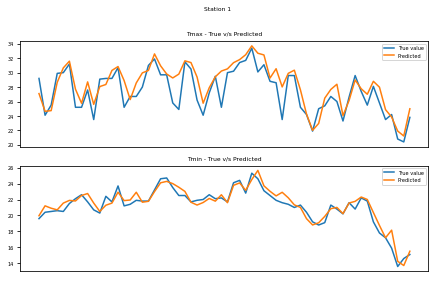

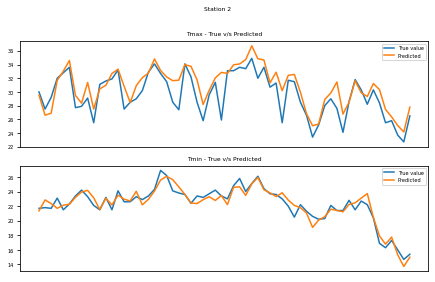

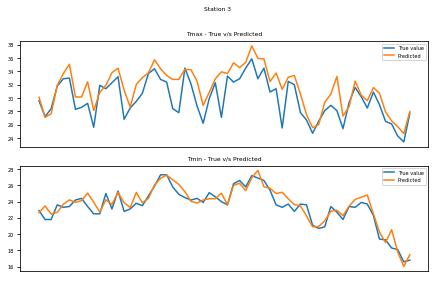

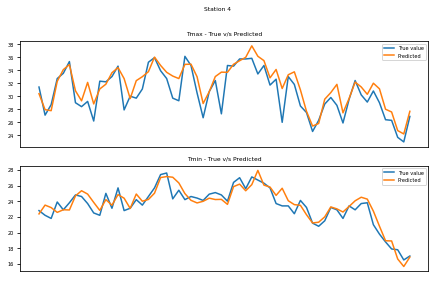

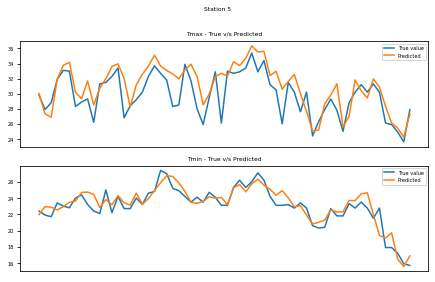

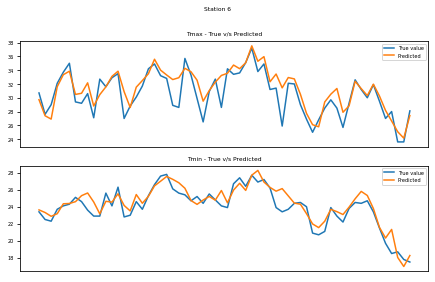

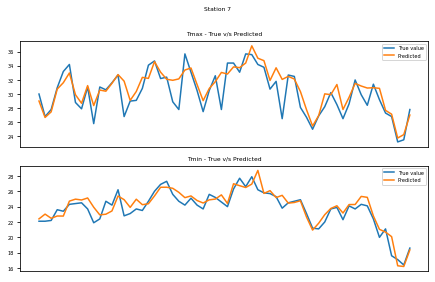

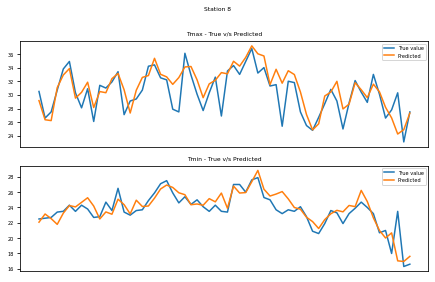

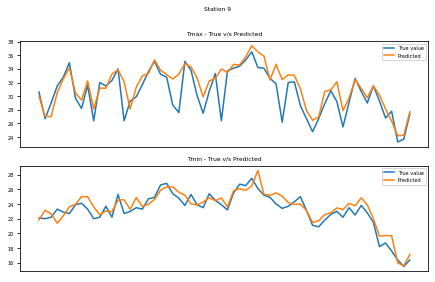

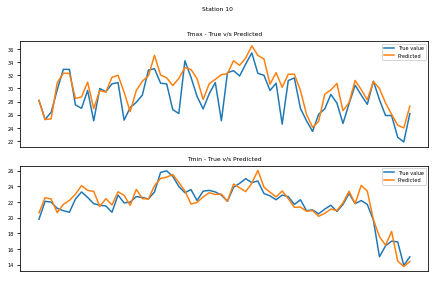

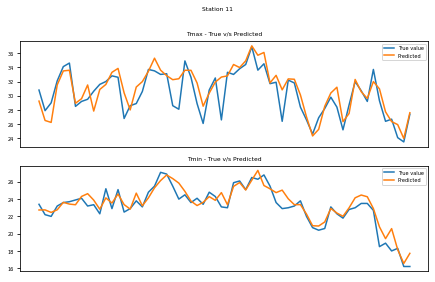

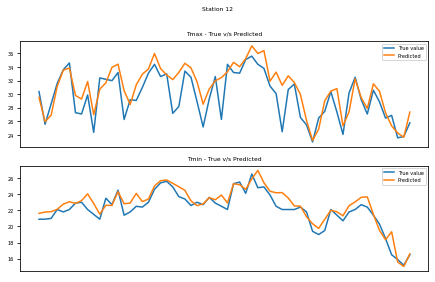

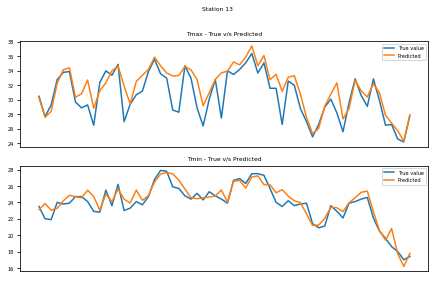

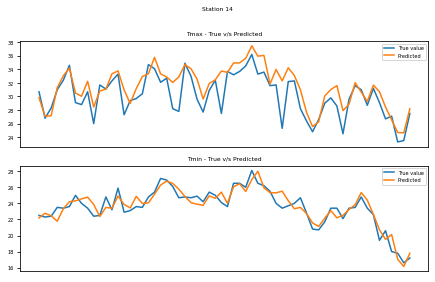

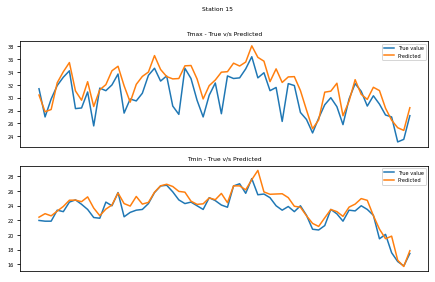

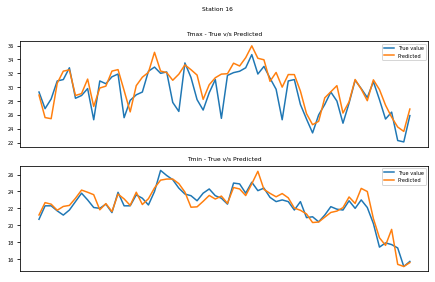

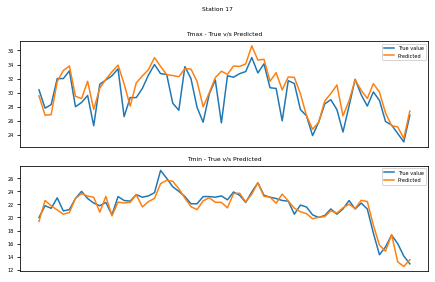

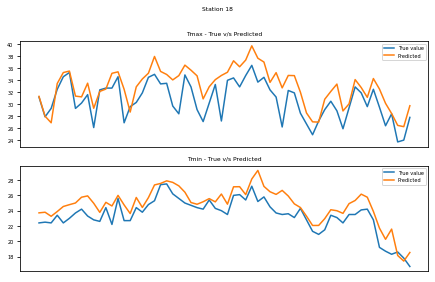

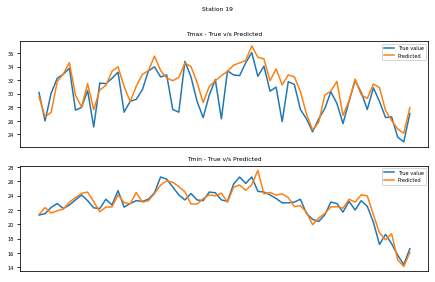

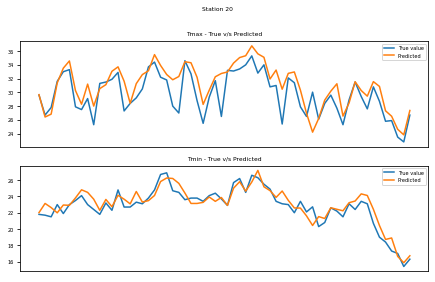

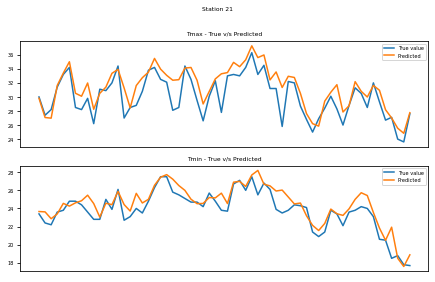

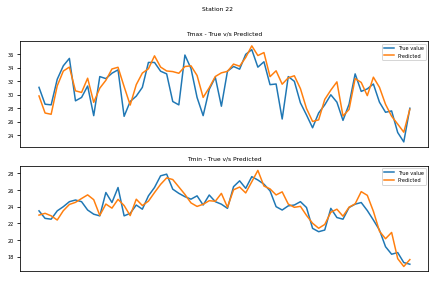

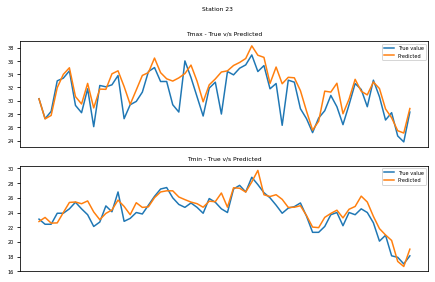

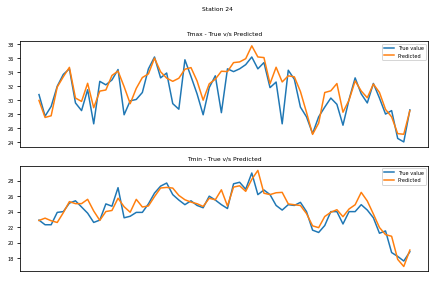

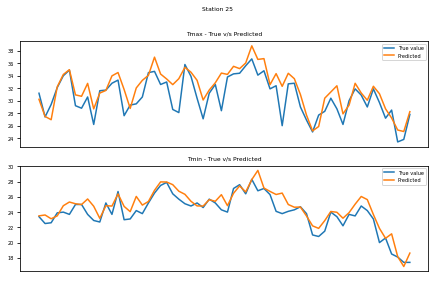

In [110]:
for iter_no in range(1,len(station_info)):  
        
        summary[iter_no], acc[iter_no] = run(station_info[iter_no], sl, iter_no)

In [111]:
summary[0] = [0,0]
summary_df = pd.DataFrame(summary, columns=['Next_Tmax','Next_Tmin'])
summary_df['Station'] = summary_df.index
    
cols = summary_df.columns.to_list()
cols = cols[-1:] + cols[:-1]
    
summary_df = summary_df[cols]
summary_df.drop(summary_df.head(1).index, inplace=True)
summary_df.index = range(0,len(summary_df))

In [112]:
acc[0] = [0,0]
acc_df = pd.DataFrame(acc, columns=['Next_Tmax','Next_Tmin'])
acc_df['Station'] = acc_df.index
    
cols = acc_df.columns.to_list()
cols = cols[-1:] + cols[:-1]
    
acc_df = acc_df[cols]
acc_df.drop(acc_df.head(1).index, inplace=True)
acc_df.index = range(0,len(acc_df))

print('Accuracy at individual station is: ')
print(acc_df)
print()
    
print('Avg accuracy for Next_Tmax is: {}'.format(acc_df['Next_Tmax'].mean()))
print('Avg accuracy for Next_Tmin is: {}'.format(acc_df['Next_Tmin'].mean()))   

Accuracy at individual station is: 
    Station  Next_Tmax  Next_Tmin
0         1      81.50      86.64
1         2      80.94      86.57
2         3      81.81      86.09
3         4      81.88      86.43
4         5      78.64      84.64
5         6      80.32      84.87
6         7      79.21      80.84
7         8      82.89      84.85
8         9      80.09      83.20
9        10      80.77      84.26
10       11      78.42      83.72
11       12      78.82      85.74
12       13      80.81      87.51
13       14      80.53      82.19
14       15      78.38      86.03
15       16      79.02      84.07
16       17      79.97      86.57
17       18      80.01      84.62
18       19      80.32      85.36
19       20      82.34      85.37
20       21      82.30      85.33
21       22      79.24      84.23
22       23      81.93      81.97
23       24      81.85      82.39
24       25      81.63      84.72

Avg accuracy for Next_Tmax is: 80.54479999999998
Avg accuracy for Next_Tmin is:

Above we have predicted the Next_Tmax and Next_Tmin using Linear Regression with the accuracy of 81% and 85%.

Saving the model:-

In [114]:
import joblib
joblib.dump(summary,"SouthKorea Temperture Prediction")

['SouthKorea Temperture Prediction']